In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import iplot
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_excel('bank.xlsx', sheet_name='bank')
df = df.sample(frac=1).reset_index(drop=True)
df2 = df.copy()
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,56,admin.,married,secondary,no,510,yes,no,cellular,10,jul,288,1,-1,0,unknown,no
1,32,technician,married,secondary,no,616,yes,no,cellular,27,aug,118,7,-1,0,unknown,no
2,31,blue-collar,married,secondary,no,-190,yes,yes,cellular,8,may,299,3,-1,0,unknown,no
3,45,blue-collar,married,secondary,no,-221,yes,yes,unknown,3,jun,170,1,-1,0,unknown,no
4,55,technician,married,secondary,no,3899,yes,no,telephone,28,jul,596,4,-1,0,unknown,yes


In [3]:
df.shape

(11162, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [32]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


### Analysis of the response column

It is very important to look at the response column, which holds the information, which we are going to predict. In our case we should look at 'deposit' column and compare its values to other columns. 
<br> First of all we should look at the number of 'yes' and 'no' values in the response column 'deposit'.

<AxesSubplot: title={'center': 'Deposit value counts'}>

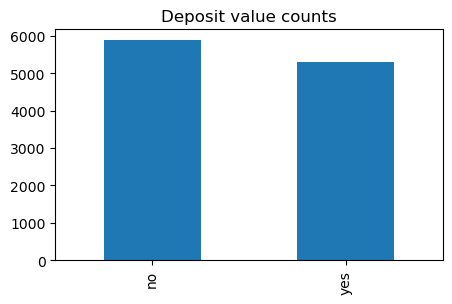

In [5]:
value_counts = df['deposit'].value_counts()
value_counts.plot.bar(title = 'Deposit value counts', figsize=(5, 3))

On the diagram we see that counts for 'yes' and 'no' values for 'deposit' are close, so we can use accuracy as a metric for a model, which predicts the campaign outcome.

Let's see how 'deposit' column value varies depending on other categorical columns' values:

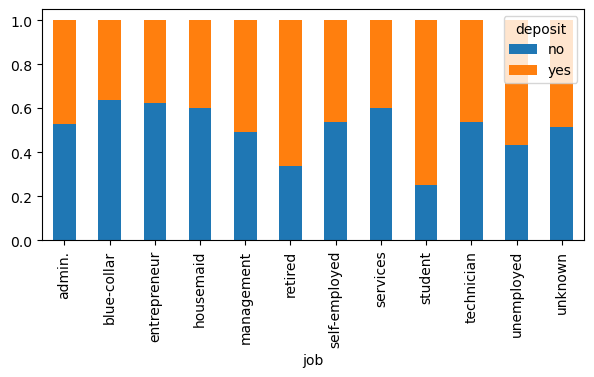

In [6]:
ct = pd.crosstab(df['job'], df['deposit'], normalize=0)
ct.plot.bar(stacked=True, figsize=(7, 3))
plt.show()

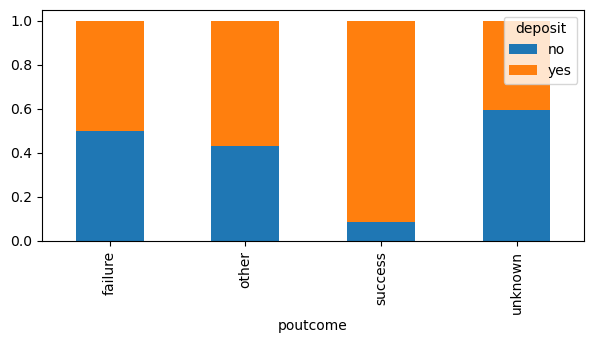

In [7]:
ct = pd.crosstab(df['poutcome'], df['deposit'], normalize=0)
ct.plot.bar(stacked=True, figsize=(7, 3))
plt.show()

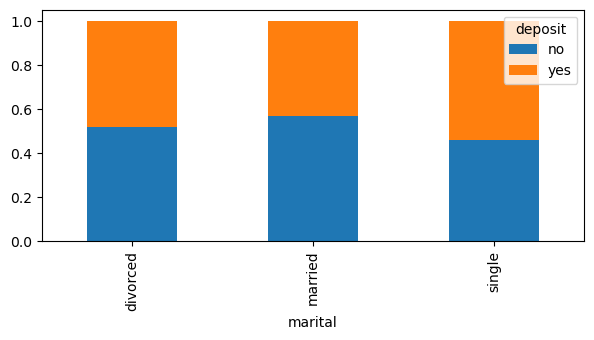

In [8]:
ct = pd.crosstab(df['marital'], df['deposit'], normalize=0)
ct.plot.bar(stacked=True, figsize=(7, 3))
plt.show()

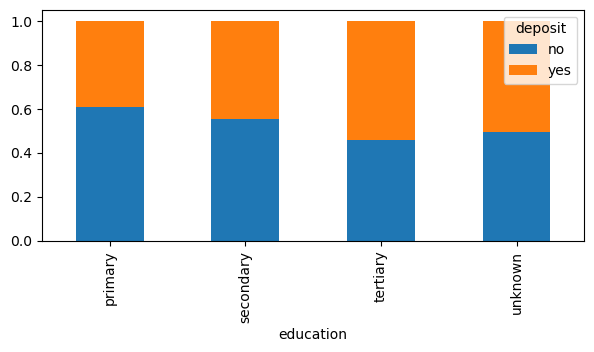

In [9]:
ct = pd.crosstab(df['education'], df['deposit'], normalize=0)
ct.plot.bar(stacked=True, figsize=(7, 3))
plt.show()

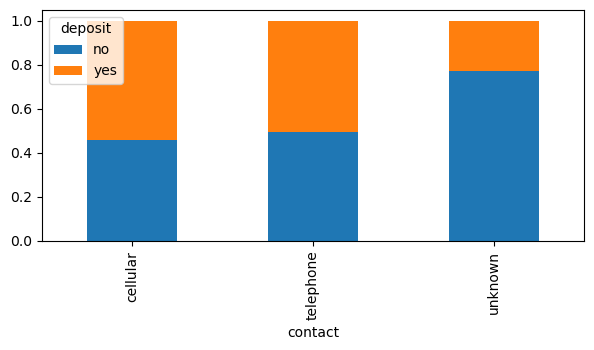

In [10]:
ct = pd.crosstab(df['contact'], df['deposit'], normalize=0)
ct.plot.bar(stacked=True, figsize=(7, 3))
plt.show()

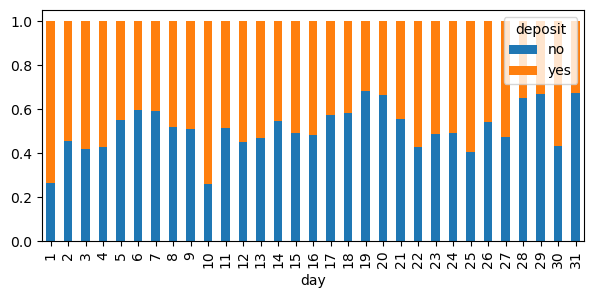

In [76]:
ct = pd.crosstab(df['day'], df['deposit'], normalize=0)
ct.plot.bar(stacked=True, figsize=(7, 3))
plt.show()

<Figure size 1000x500 with 0 Axes>

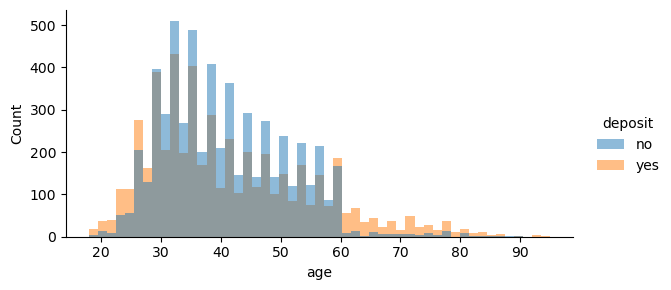

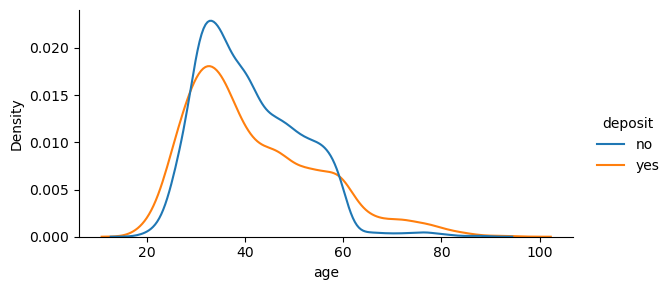

In [12]:
plt.figure(figsize=(10,5))
plt.rcParams['patch.edgecolor'] = 'none'
sns.displot(data=df, x='age', hue='deposit', height=3, aspect=2, kind='hist')
sns.displot(data=df, x='age', hue='deposit', height=3, aspect=2, kind='kde')
plt.show()

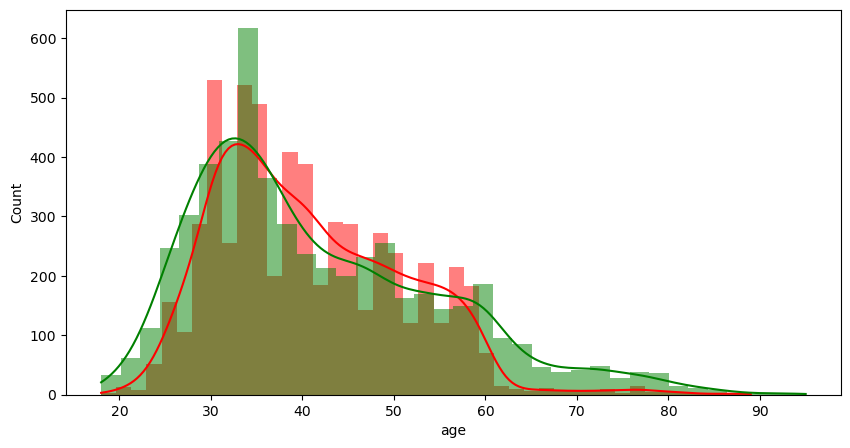

In [13]:
df0 = df[df['deposit']=='no']
df1 = df[df['deposit']=='yes']

plt.figure(figsize=(10,5))
plt.rcParams['patch.edgecolor'] = 'none'
sns.histplot(data=df0, x='age', color='red', kde = True)
sns.histplot(data=df1, x='age', color='green', kde = True)
plt.show()

<Figure size 1000x500 with 0 Axes>

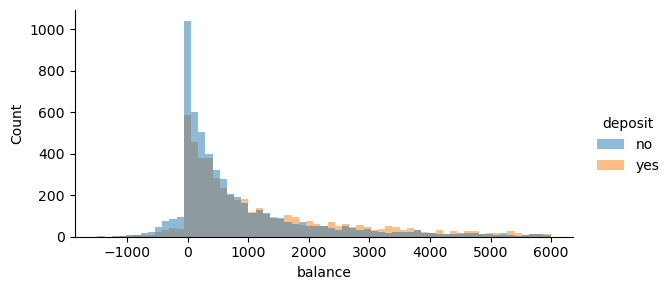

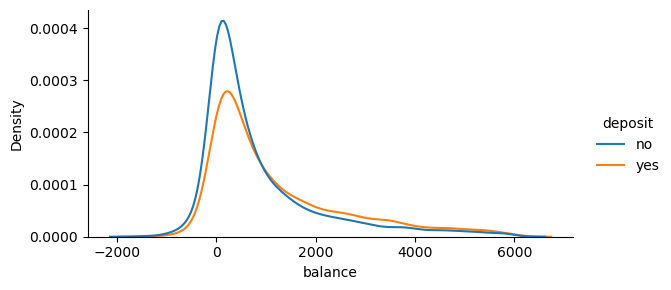

In [14]:
dfb = df2.copy()
dfb = dfb[(dfb['balance']<6000)&(dfb['balance']>-1500) ]
plt.figure(figsize=(10,5))
plt.rcParams['patch.edgecolor'] = 'none'
sns.displot(data=dfb, x='balance', hue='deposit', height=3, aspect=2, kind='hist')
sns.displot(data=dfb, x='balance', hue='deposit', height=3, aspect=2, kind='kde')
plt.show()

### Modeling Approach (Statistics)

In [15]:
df.select_dtypes(include='object').columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

In [16]:
y = df[['deposit']].copy()
y['deposit'] = y['deposit'].map({'yes':1, 'no':0})
#X = df.drop(['deposit', 'duration', 'campaign', 'pdays'], axis=1)
X = df.drop('deposit', axis=1)

In [17]:
obj_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome']

X = pd.get_dummies(X, columns=obj_cols, drop_first=True)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import statsmodels.api as sm

In [19]:
Xc = sm.add_constant(X)
model = sm.Logit(y, Xc).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.408112
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                deposit   No. Observations:                11162
Model:                          Logit   Df Residuals:                    11119
Method:                           MLE   Df Model:                           42
Date:                Thu, 09 Nov 2023   Pseudo R-squ.:                  0.4101
Time:                        09:31:43   Log-Likelihood:                -4555.3
converged:                       True   LL-Null:                       -7721.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.7870      0.269     -2.931      0.003      -1.313      -0.261
age                    -0.0008      0.003     -0.239      0.811      -0.007       0.006
balance              2.799e-05   8.52e-06      3.287      0.001    1.13e-05    4.47e-05
day                     0.0037      0.004      1.056      0.291      -0.003       0.011
duration                0.0055      0.000     43.973      0.000       0.005       0.006
campaign               -0.0912      0.014     -6.696      0.000      -0.118      -0.064
pdays               -8.934e-05      0.000     -0.208      0.835      -0.001       0.001
previous                0.0173      0.014      1.218      0.223      -0.011       0.045
job_blue-collar        -0.3314      0.104     -3.178      0.001      -0.536      -0.127
job_entrepreneur       -0.3955      0.176     -2.244      0.025      -0.741      -0.050
job_housemaid          -0.4757      0.191     -2.489      0.013      -0.850      -0.101
job_management         -0.2683      0.108     -2.496      0.013      -0.479      -0.058
job_retired             0.2972      0.147      2.017      0.044       0.008       0.586
job_self-employed      -0.4298      0.162     -2.657      0.008      -0.747      -0.113
job_services           -0.2835      0.121     -2.352      0.019      -0.520      -0.047
job_student             0.5907      0.176      3.351      0.001       0.245       0.936
job_technician         -0.1567      0.099     -1.577      0.115      -0.351       0.038
job_unemployed         -0.1169      0.167     -0.698      0.485      -0.445       0.211
job_unknown            -0.3942      0.345     -1.144      0.253      -1.070       0.281
marital_married        -0.1800      0.086     -2.101      0.036      -0.348      -0.012
marital_single          0.0767      0.099      0.778      0.436      -0.116       0.270
education_secondary     0.2053      0.093      2.212      0.027       0.023       0.387
education_tertiary      0.4631      0.109      4.236      0.000       0.249       0.677
education_unknown       0.2640      0.151      1.753      0.080      -0.031       0.559
default_yes            -0.0085      0.222     -0.038      0.970      -0.443       0.426
housing_yes            -0.7001      0.062    -11.260      0.000      -0.822      -0.578
loan_yes               -0.5019      0.084     -5.988      0.000      -0.666      -0.338
contact_telephone      -0.0533      0.108     -0.494      0.622      -0.265       0.158
contact_unknown        -1.5552      0.097    -16.090      0.000      -1.745      -1.366
month_aug              -0.8185      0.111     -7.377      0.000      -1.036      -0.601
month_dec               1.3732      0.371      3.705      0.000       0.647       2.100
month_feb              -0.1675      0.128     -1.311      0.190      -0.418       0.083
month_jan              -1.2391      0.167     -7.414      0.000      -1.567      -0.912
month_jul              -0.9824      0.112     -8.753      0.000      -1.2

In [20]:
cols = Xc.columns.tolist()
pmax=1
while (len(cols)>0):
    X_1 = Xc[cols]
    model = sm.Logit(y, X_1).fit()
    p = model.pvalues
    p = p.drop(labels = ['const'])  
    pmax = max(p)
    feature_max_p = p.idxmax()
    if (pmax>0.05):
        cols.remove(feature_max_p)
        print(feature_max_p, '  is removed ', pmax)
    else:
        break
selected_features = cols
print(selected_features)

Optimization terminated successfully.
         Current function value: 0.408112
         Iterations 7
default_yes   is removed  0.9695581327534367
Optimization terminated successfully.
         Current function value: 0.408112
         Iterations 7
pdays   is removed  0.8349735658900573
Optimization terminated successfully.
         Current function value: 0.408114
         Iterations 7
age   is removed  0.808883728434834
Optimization terminated successfully.
         Current function value: 0.408117
         Iterations 7
contact_telephone   is removed  0.5930638919858795
Optimization terminated successfully.
         Current function value: 0.408130
         Iterations 7
poutcome_other   is removed  0.4989243009370772
Optimization terminated successfully.
         Current function value: 0.408150
         Iterations 7
job_unemployed   is removed  0.47822969119905623
Optimization terminated successfully.
         Current function value: 0.408173
         Iterations 7
marital_single   i

In [21]:
model = sm.Logit(y, Xc[selected_features]).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.409368
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                deposit   No. Observations:                11162
Model:                          Logit   Df Residuals:                    11137
Method:                           MLE   Df Model:                           24
Date:                Thu, 09 Nov 2023   Pseudo R-squ.:                  0.4082
Time:                        09:31:45   Log-Likelihood:                -4569.4
converged:                       True   LL-Null:                       -7721.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.6920      0.103     -6.735      0.000      -0.893      -0.491
balance             2.754e-05   8.48e-06      3.247      0.001    1.09e-05    4.42e-05
duration               0.0055      0.000     44.069      0.000       0.005       0.006
campaign              -0.0899      0.013     -6.734      0.000      -0.116      -0.064
job_blue-collar       -0.1961      0.078     -2.519      0.012      -0.349      -0.044
job_housemaid         -0.3727      0.173     -2.149      0.032      -0.713      -0.033
job_retired            0.3893      0.108      3.620      0.000       0.179       0.600
job_student            0.8102      0.156      5.210      0.000       0.505       1.115
marital_married       -0.2613      0.054     -4.798      0.000      -0.368      -0.155
education_tertiary     0.2113      0.059      3.572      0.000       0.095       0.327
housing_yes           -0.6872      0.061    -11.302      0.000      -0.806      -0.568
loan_yes              -0.5010      0.083     -6.028      0.000      -0.664      -0.338
contact_unknown       -1.5571      0.095    -16.358      0.000      -1.744      -1.371
month_aug             -0.7418      0.093     -7.996      0.000      -0.924      -0.560
month_dec              1.4599      0.365      3.998      0.000       0.744       2.175
month_jan             -1.1084      0.155     -7.158      0.000      -1.412      -0.805
month_jul             -0.9153      0.097     -9.473      0.000      -1.105      -0.726
month_jun              0.3430      0.114      3.016      0.003       0.120       0.566
month_mar              2.1119      0.220      9.589      0.000       1.680       2.544
month_may             -0.5838      0.091     -6.428      0.000      -0.762      -0.406
month_nov             -0.8913      0.106     -8.430      0.000      -1.098      -0.684
month_oct              1.1758      0.166      7.099      0.000       0.851       1.500
month_sep              1.0181      0.190      5.366      0.000       0.646       1.390
poutcome_success       2.2120      0.132     16.747      0.000       1.953       2.471
poutcome_unknown      -0.3430      0.071     -4.828      0.000      -0.482      -0.204
======================================================================================
"""

In [22]:
y_pred_prob = model.predict(Xc[selected_features])
y_pred = np.where(y_pred_prob>=0.5, 1, 0)

In [23]:
print('Accuracy Score: ', accuracy_score(y, y_pred))

Accuracy Score:  0.8264647912560473


In [24]:
print('ROC score: ', roc_auc_score(y, y_pred_prob))

ROC score:  0.9044876172550924


In [25]:
fpr, tpr, thresh = roc_curve(y, y_pred_prob)

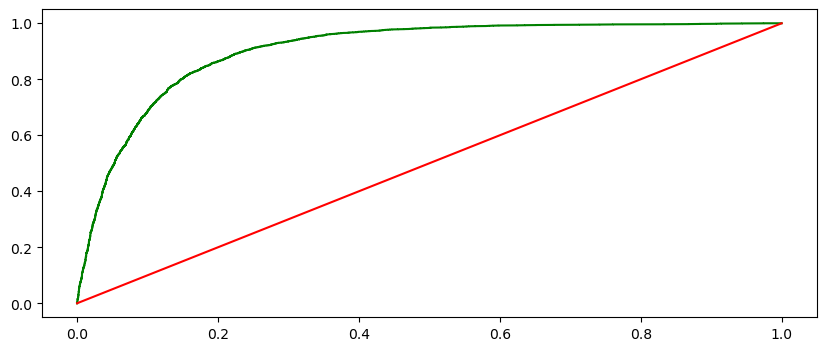

In [26]:
plt.figure(figsize=(10, 4))
plt.plot(fpr, tpr, 'g')
plt.plot(fpr, fpr, 'r')
plt.show()

### Model Approach (Machine Learning)

In [27]:
df = df2.copy()
y = df[['deposit']].copy()
y['deposit'] = y['deposit'].map({'yes':1, 'no':0})
X = df.drop(['deposit', 'duration', 'month', 'day'], axis=1)

In [28]:
cat_cols = X.select_dtypes(include='object').columns
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'poutcome'],
      dtype='object')

In [29]:
X = pd.get_dummies(X, columns=cat_cols)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
from sklearn.metrics import accuracy_score, roc_auc_score

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_train_pred = dtc.predict(X_train)
y_train_prob = dtc.predict_proba(X_train)[:,1]

print('Train-Accuracy: ', accuracy_score(y_train, y_train_pred))
print('Train-AUC: ', roc_auc_score(y_train, y_train_prob))

y_test_pred = dtc.predict(X_test)
y_test_prob = dtc.predict_proba(X_test)[:,1]

print('Test-Accuracy: ', accuracy_score(y_test, y_test_pred))
print('Test-AUC: ', roc_auc_score(y_test, y_test_prob))

Train-Accuracy:  0.9998720081914757
Train-AUC:  0.9999999671814841
Test-Accuracy:  0.6061510898775754
Test-AUC:  0.6040262073489966


### Hyperparameter Tuning - Grid Search Approach

In [162]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [163]:
dtc = DecisionTreeClassifier()

params = {'max_depth': [4, 6, 8, 10, 12],
             'criterion': ['gini', 'entropy'],
             'min_samples_leaf': [15, 20, 25, 30, 35, 40]}

gsearch = GridSearchCV(dtc, param_grid=params, scoring='roc_auc', cv=3)
gsearch.fit(X, y)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10, 12],
                         'min_samples_leaf': [15, 20, 25, 30, 35, 40]},
             scoring='roc_auc')

In [164]:
pd.DataFrame(gsearch.cv_results_).iloc[:,4:].head(2)

,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,gini,4,15,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.717404,0.717166,0.715547,0.716705,0.000825,49
1,gini,4,20,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.718083,0.717314,0.716106,0.717168,0.000814,48


In [165]:
gsearch.best_params_

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 40}

In [166]:
from sklearn.metrics import accuracy_score, roc_auc_score

dtc = DecisionTreeClassifier(**gsearch.best_params_)
dtc.fit(X_train, y_train)

y_train_pred = dtc.predict(X_train)
y_train_prob = dtc.predict_proba(X_train)[:,1]

print('Train-Accuracy: ', accuracy_score(y_train, y_train_pred))
print('Train-AUC: ', roc_auc_score(y_train, y_train_prob))

y_test_pred = dtc.predict(X_test)
y_test_prob = dtc.predict_proba(X_test)[:,1]

print('Test-Accuracy: ', accuracy_score(y_test, y_test_pred))
print('Test-AUC: ', roc_auc_score(y_test, y_test_prob))

Train-Accuracy:  0.6921797004991681
Train-AUC:  0.7606412036726903
Test-Accuracy:  0.6864735742012541
Test-AUC:  0.7360859454674626


### Hyperparameter Tuning - Randomized Search Approach

In [167]:
dtc = DecisionTreeClassifier(random_state=4)

from scipy.stats import randint as sp_randint

params_dist = {'max_depth': sp_randint(5, 15),
              'min_samples_leaf': sp_randint(10, 40),
               'criterion': ['gini', 'entropy']} 

rsearch = RandomizedSearchCV(dtc, param_distributions=params_dist, 
    n_iter=350, cv=3, scoring='roc_auc', random_state=4, n_jobs=-1)

rsearch.fit(X, y)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=4),
                   n_iter=350, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001B04DEFDA90>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001B052761040>},
                   random_state=4, scoring='roc_auc')

In [168]:
rsearch.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 37}

In [169]:
dtc = DecisionTreeClassifier(**rsearch.best_params_)
dtc.fit(X_train, y_train)

y_train_pred = dtc.predict(X_train)
y_train_prob = dtc.predict_proba(X_train)[:,1]

print('Train-Accuracy: ', accuracy_score(y_train, y_train_pred))
print('Train-AUC: ', roc_auc_score(y_train, y_train_prob))

y_test_pred = dtc.predict(X_test)
y_test_prob = dtc.predict_proba(X_test)[:,1]

print('Test-Accuracy: ', accuracy_score(y_test, y_test_pred))
print('Test-AUC: ', roc_auc_score(y_test, y_test_prob))

Train-Accuracy:  0.6902598233713042
Train-AUC:  0.7596859177903121
Test-Accuracy:  0.6787100627052851
Test-AUC:  0.7316608704121739


In [170]:
imp = pd.DataFrame(dtc.feature_importances_, index=X.columns, columns=['imp'])
imp.sort_values('imp', ascending=False).head(10)

,imp
poutcome_success,0.365200
contact_unknown,0.185910
age,0.135102
balance,0.116395
housing_no,0.058219
pdays,0.048657
campaign,0.047452
marital_married,0.016870
education_secondary,0.005892
education_tertiary,0.005577


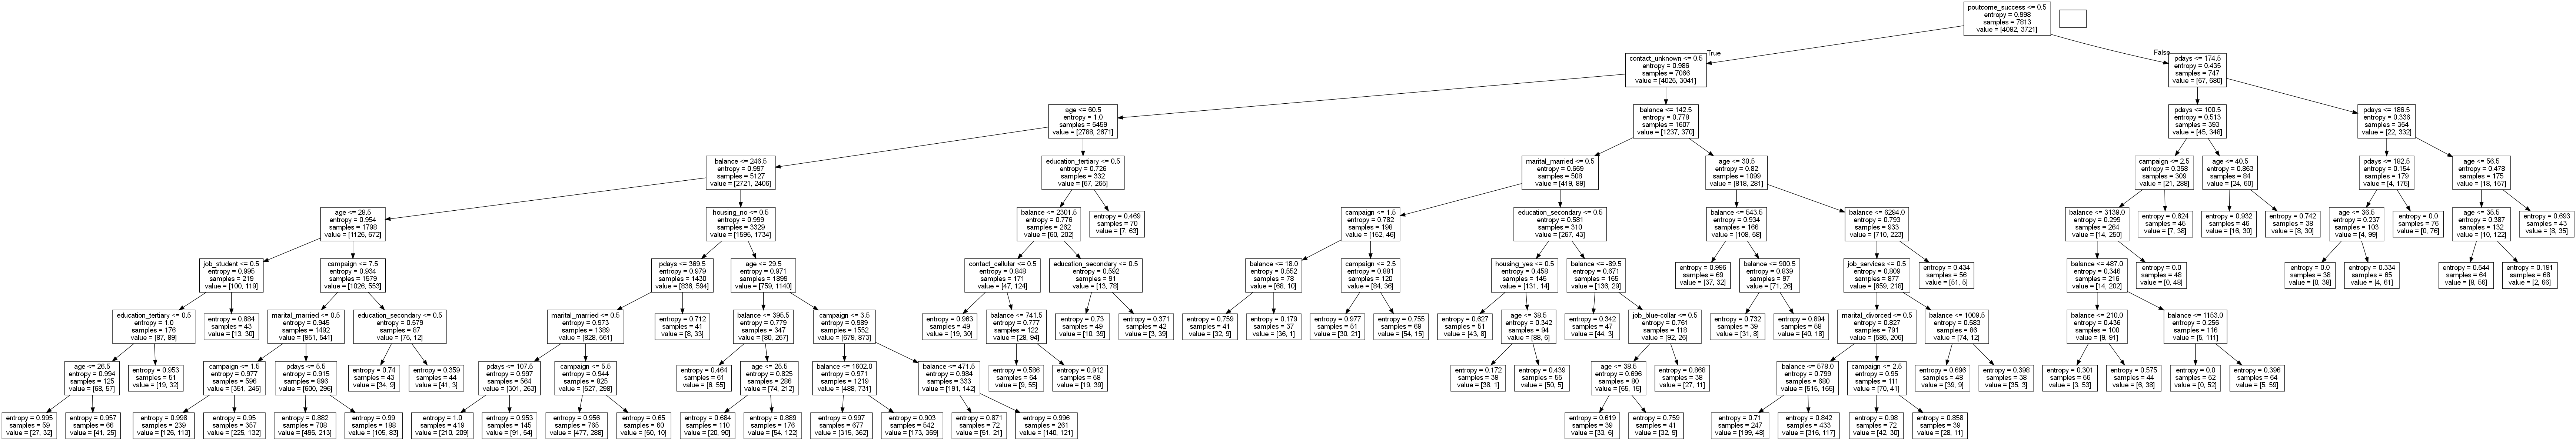

In [171]:
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

features = X_train.columns
# Create DOT data
dot_data = export_graphviz(dtc, out_file=None, feature_names=features)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [172]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

### Finding Optimal threshold by minimizing cost

In [173]:
y_test_prob = pd.Series(y_test_prob)

In [174]:
Cost_FP = 10
Cost_FN = 20

In [175]:
def calculate_cost(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    cost = cm[0,1]*Cost_FP + cm[1,0]*Cost_FN
    fpr = cm[0,1]/(cm[0,0]+cm[0,1])
    return cost, fpr

df_cost = pd.DataFrame(columns=['threshold', 'cost', 'fpr'])

i=0
for threshold in range(1, 100):
    y_test_pred = y_test_prob.map(lambda x: 1 if x>threshold/100 else 0)
    cost, fpr = calculate_cost(y_test, y_test_pred)
    df_cost.loc[i] = [threshold/100, cost, fpr]
    i+=1

In [176]:
df_cost.head()

,threshold,cost,fpr
0,0.01,17810.0,1.000000
1,0.02,17810.0,1.000000
2,0.03,17740.0,0.987086
3,0.04,17740.0,0.987086
4,0.05,17740.0,0.987086


In [177]:
df_cost.sort_values(by='cost').head()

,threshold,cost,fpr
28,0.29,15340.0,0.697361
29,0.30,15370.0,0.686693
27,0.28,15560.0,0.716451
35,0.36,15580.0,0.571589
34,0.35,15580.0,0.571589


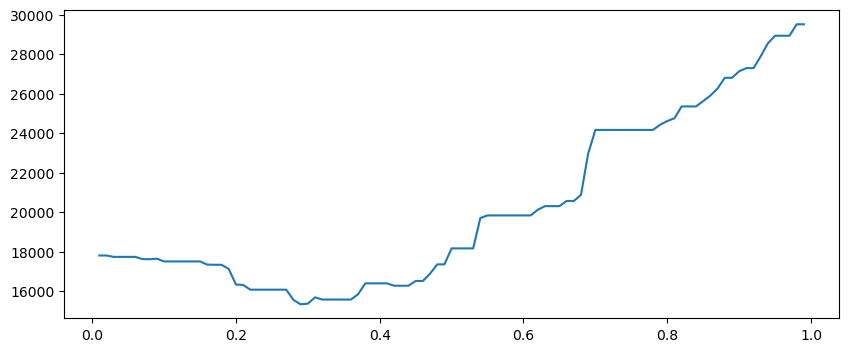

In [178]:
plt.figure(figsize=(10, 4))
plt.plot(df_cost['threshold'], df_cost['cost'])
plt.show()

In [179]:
fpr, tpr, thresh = roc_curve(y_test, y_test_prob)

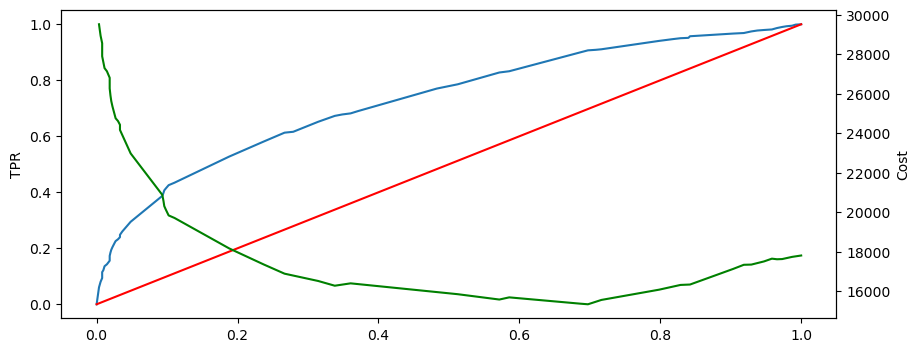

In [180]:
fig, ax1 = plt.subplots(figsize=(10, 4))
ax1.plot(fpr, tpr)
ax1.plot(fpr, fpr, 'r')
ax1.set_ylabel('TPR')
ax2 = ax1.twinx()
ax2.set_ylabel('Cost')
ax2.plot( df_cost['fpr'],  df_cost['cost'], 'g')
plt.show()

### Illustration of Hypothesis Tests

### t-test - one sample

In [57]:
df = df2.copy()

We like to whether mean(balance) = 1000

<b>Hypothesis</b> <br> H0: μ1 = 1000 <br> H1: μ1 != 1000

In [35]:
import numpy as np  
from scipy import stats  

# Using the Stats library, compute t-statistic and p-value
t_stat, p_val = stats.ttest_1samp(a=df['balance'], popmean = 1000)
print("t-statistic = " + str(t_stat))  
print("p-value = " + str(p_val)) 

t-statistic = 17.31259941807345
p-value = 2.765478470291323e-66


### t-test - two samples

We like to whether mean(balance) of 'yes' = mean(balance) of 'no'

<b>Hypothesis</b> <br> H0: μ1 = μ2 <br> H1: μ1 != μ2

In [39]:
df0 = df['balance'][df['deposit']=='no']
df1 = df['balance'][df['deposit']=='yes']

In [41]:
t_stat, p_val = stats.ttest_ind(df1, df0, equal_var = False) 
print("t-statistic = " + str(t_stat))  
print("p-value = " + str(p_val))

t-statistic = 8.520420767660433
p-value = 1.8105789895875916e-17


### ANOVA

We like to test whether mean(balance) of 'admin' = mean(balance) of 'technician' etc.

<b>Hypothesis</b> <br> H0: μ1  = μ2  = μ3 . . . <br> H1: μ1 != μ2 != μ3 . . .

In [69]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('balance ~ job', data=df).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq       df         F        PR(>F)
job       1.418253e+09     11.0  12.53428  6.367901e-24
Residual  1.146929e+11  11150.0       NaN           NaN


### Chi-Square Test

We like to whether deposit and education are dependent or not

<b>Hypothesis</b> <br> H0: deposit and education are independent <br> H1: deposit and education are dependent

In [70]:
ct = pd.crosstab(df['deposit'], df['education'])
ct

education,primary,secondary,tertiary,unknown
deposit,,,,
no,909,3026,1693,245
yes,591,2450,1996,252


In [71]:
pd.crosstab(df['deposit'], df['education'], normalize=1)

education,primary,secondary,tertiary,unknown
deposit,,,,
no,0.606,0.552593,0.458932,0.492958
yes,0.394,0.447407,0.541068,0.507042


In [68]:
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(ct)
 
print('stat: ', stat)
print('p:    ', p)

stat:  0.05090173438231152
p:     0.9969918781318821


### Hyperparameter Tuning - Hyperopt

In [198]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials, anneal
from sklearn.model_selection import cross_val_score
dtc = DecisionTreeClassifier()

In [199]:
parameter_space = { 'min_samples_leaf': hp.quniform('min_samples_leaf',1,50, 1),
                       'max_depth': hp.quniform('max_depth', 1,10,1),
                      'criterion': hp.choice('criterion', ['gini', 'entropy'])}
 
# Defining a cost function which the Bayesian algorithm will optimize
def objective(parameter_space):
    Error = cross_val_score(dtc, X_train, y_train, cv = 3, scoring='roc_auc').mean()
    return {'loss': -Error, 'status': STATUS_OK }
 
# Finding out which set of hyperparameters give highest accuracy
trials = Trials()
best_params = fmin(fn= objective,
            space= parameter_space,
            algo= tpe.suggest,
            #algo=anneal.suggest,  # the logic which chooses next parameter to try
            max_evals = 200, trials= trials)

100%|█████████████████████████████████████████████| 200/200 [00:42<00:00,  4.71trial/s, best loss: -0.6078141701383885]


In [200]:
print('The best parameters are:', best_params)

The best parameters are: {'criterion': 0, 'max_depth': 8.0, 'min_samples_leaf': 12.0}


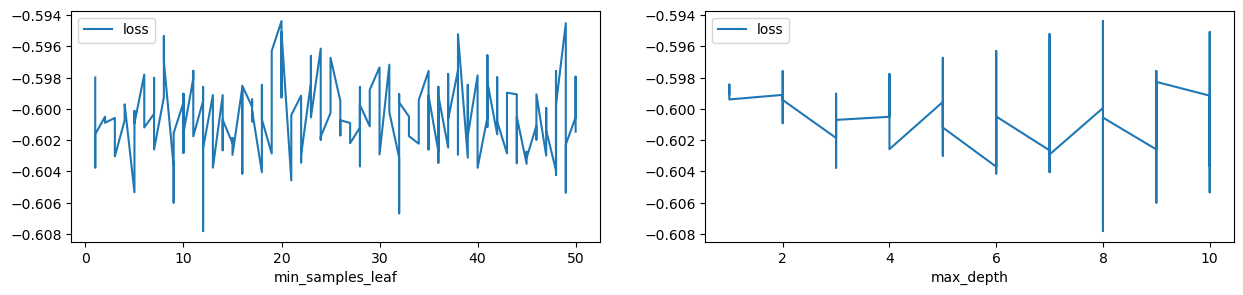

In [201]:
# Dataframe of results from optimization
search_results = pd.DataFrame({'loss': trials.losses(), 
                               'min_samples_leaf': trials.vals['min_samples_leaf'],
                               'max_depth': trials.vals['max_depth']})
 
# Visualizing all the parameter trials
import matplotlib.pyplot as plt
fig, subPlots=plt.subplots(nrows=1, ncols=2, figsize=(15,3))
search_results.sort_values(by='min_samples_leaf').plot(x='min_samples_leaf', y='loss', ax=subPlots[0])
search_results.sort_values(by='max_depth').plot(x='max_depth', y='loss', ax=subPlots[1])
plt.show()